In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

import torch
import torchvision
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

from utils import image as imagetils
from nnet import data
from nnet.model import create_model
from utils import metrics
from torch.utils.data import DataLoader
from tqdm import tqdm

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
model = create_model(6)

In [5]:
model_ids = os.listdir('./trained_models/')

In [6]:
models = [f for f in model_ids if 'model' in f]
ids = [re.search(r'model_(.*?).pt', m).group(1) for m in models]
ids

['1630332502',
 '1630335280',
 '1630255481',
 '1630254037',
 '1630257342',
 '1630252589',
 '1630326794',
 '1630329638',
 '1630253064',
 '1630327718']

In [13]:
target_model_id = '1630254037'
model.load_state_dict(torch.load(f'./trained_models/model_{target_model_id}.pt'))
model.eval();

In [7]:
# results = {}
# for mid in ids:
#     model.load_state_dict(torch.load(f'./trained_models/model_{mid}.pt'))
#     model.eval()
#     model.to(device);

#     im_preproc = data.image_preprocess_transforms_generator()
#     lab_preproc = data.labels_preprocess_transforms_generator()
#     val_data = data.VaihingenDataset(
#         './proc_data/proc_data.json', 
#         x_transform=im_preproc,
#         y_transform=lab_preproc,
#         split='val')

#     iou_calculator = metrics.IoU(num_classes=6)
#     val_dataloader = DataLoader(val_data, batch_size=64, shuffle=False)
#     for x, y in tqdm(iter(val_dataloader)):
#         inputs = x.to(device)
#         masks = (y[0]).to(device).long().squeeze()

#         outputs = model(inputs)
#     #     print(inputs.shape, masks.shape, outputs['out'].cpu().shape)
#         pred = outputs['out'].cpu()
#         iou_calculator.add(pred, masks.squeeze())
# #         print(iou_calculator.value())    
#         print(np.mean(iou_calculator.value()[0][:5]))
#     results[mid] = iou_calculator.value()
#     break

In [9]:
im_preproc = data.image_preprocess_transforms_generator()
lab_preproc = data.labels_preprocess_transforms_generator()
val_data = data.VaihingenDataset(
    './proc_data/proc_data.json', 
    x_transform=im_preproc,
    y_transform=lab_preproc,
    split='val')

363


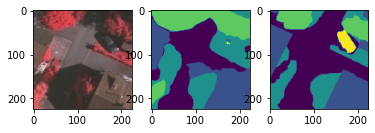

_____________
451


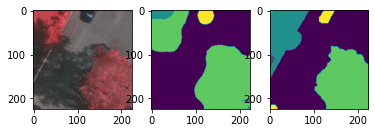

_____________
14


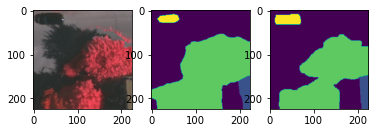

_____________
636


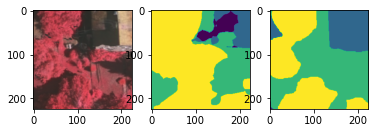

_____________
525


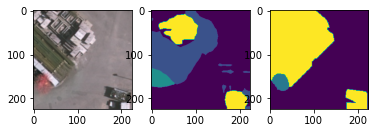

_____________
658


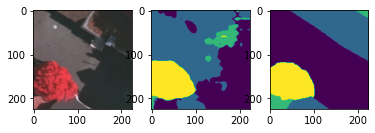

_____________
576


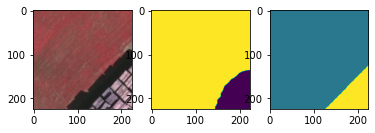

_____________
605


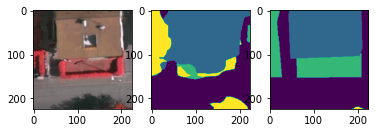

_____________
393


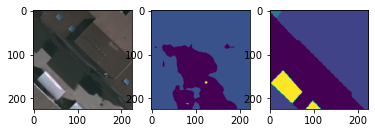

_____________
717


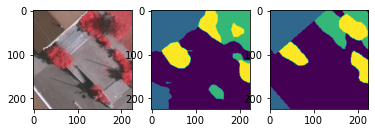

_____________
138


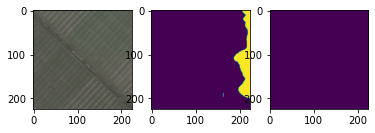

_____________
762


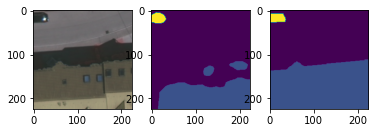

_____________
698


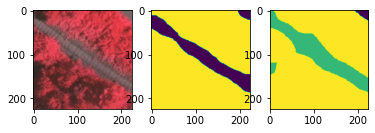

_____________
461


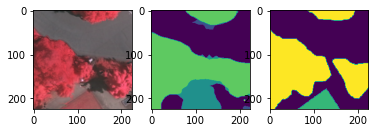

_____________
527


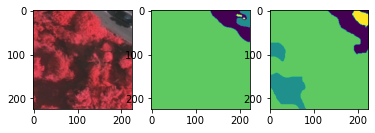

_____________
571


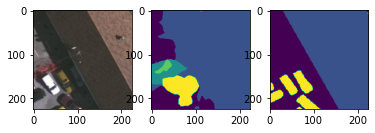

_____________
434


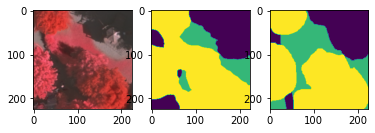

_____________
156


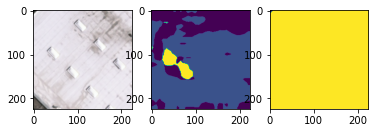

_____________
387


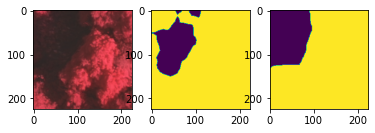

_____________
277


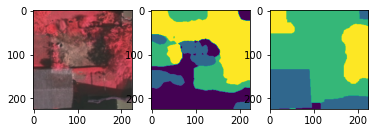

_____________


In [14]:
unnorm = imagetils.UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

for i in np.random.choice(np.arange(val_data.__len__()), 20):
    print(i)
    im, (lab, oh, is_weak) = val_data.__getitem__(i)
    output = model(im.unsqueeze(0))

    pred = torch.nn.Softmax(dim=0)(output['out'][0].cpu())
    pred_proc = np.argmax(pred.detach().numpy(), axis=0)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(imagetils.torch_to_numpy(unnorm(im)))

    plt.subplot(1,3,2)
    plt.imshow(pred_proc)

    plt.subplot(1,3,3)
    plt.imshow(imagetils.torch_to_numpy(lab))
    plt.show()
    print('_____________')

